In [1]:
import torch
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST, CelebA
from torchvision import transforms
from torch.utils.data import DataLoader

import id_gan
from id_gan.vae import VAE

In [2]:
image_transforms = transforms.Compose([ # Augmentation
    transforms.RandomRotation(30),
    transforms.RandomVerticalFlip(),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Resize((32, 32), antialias=True),
    transforms.Normalize(mean=(0.1307, ), std=(0.3081, ))
])

dataset = MNIST('./data', train=True, transform=image_transforms, download=True)

data_loader = DataLoader(
    dataset,
    batch_size=4,
    shuffle=False
)

sample, _ = next(iter(data_loader))
sample.shape

torch.Size([4, 1, 32, 32])

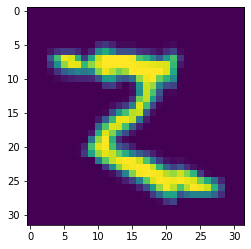

In [3]:
plt.imshow(sample[0, 0].numpy())

Using device cpu


[epoch 4] loss = 257.3248: 100%|██████████| 1175/1175 [06:22<00:00,  3.08it/s]

Saving VAE model to output/mnist_vae.pt


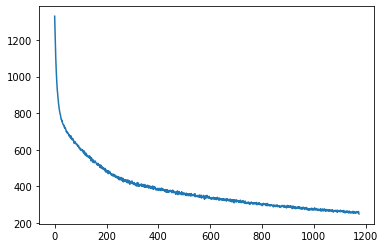

In [4]:
import id_gan
import matplotlib.pyplot as plt

results = id_gan.train_vae("mnist", batch_size=256, num_workers=0, epochs=5)
plt.plot(results["loss"])

In [5]:
import id_gan
import matplotlib.pyplot as plt

vae = id_gan.load_vae("mnist")

Loading VAE model from output/mnist_vae.pt


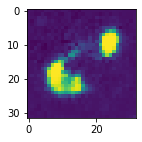

In [23]:
img = vae.sample(1)[0].numpy().transpose(1, 2, 0)

plt.figure(figsize=(2, 2))
plt.imshow(img)

Loading VAE model from output/mnist_vae.pt
Using device cpu


[epoch 0] G_loss = 2.6079, D_loss = 0.9562: 100%|██████████| 938/938 [02:39<00:00,  5.87it/s]


Saving GAN model to output/mnist_gan_g.pt, output/mnist_gan_d.pt


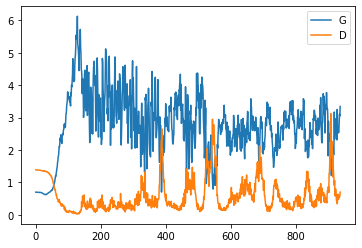

In [1]:
import id_gan
import matplotlib.pyplot as plt

results = id_gan.train_gan("mnist", epochs=1, batch_size=64)

plt.plot(results["loss_g"], label="G")
plt.plot(results["loss_d"], label="D")
plt.legend()
plt.show()

Loading GAN model from output/mnist_gan_g.pt


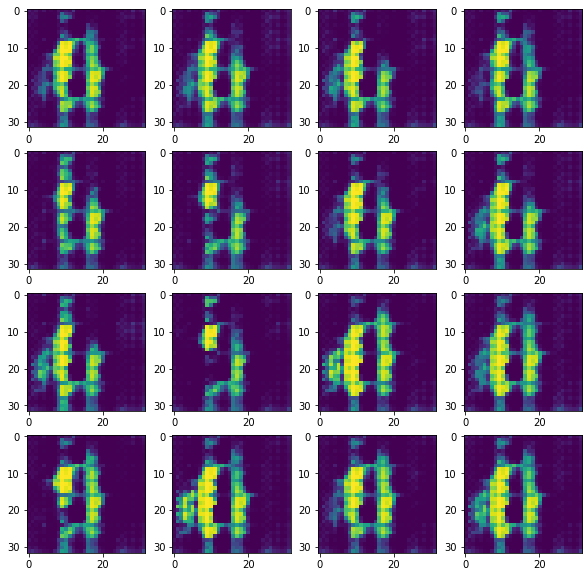

In [17]:
import torch
import id_gan
from torchvision.utils import make_grid

gan = id_gan.load_gan("mnist")

with torch.no_grad():
    z = torch.randn(16, 20)
    images = gan(z)


plt.figure(figsize=(10, 10))
for ind, image in enumerate(images):
    plt.subplot(4, 4, ind+1)
    plt.imshow(image[0].numpy())
plt.show()